<a href="https://colab.research.google.com/github/Thippawan72/BSC_DPDM23/blob/main/Classificationmin__impurity_decrease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3

ให้แต่ละกลุ่ม สร้างต้นไม้ของตัวเอง โดยปรับเปลี่ยน parameters ให้ และ มาอธิบาย parameter ของตัวเอง ว่ามันคืออะไร

- แถว 4 min_impurity_decrease

In [166]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [120]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8',
            'a9','a10','a11','a12','a13','a14','a15','a16']

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
#Loading data file
credit = pd.read_csv('/content/drive/MyDrive/BSC_DPDM23_Data/crx.data', header = None, names=col_name) # (1) Set header = None because there is no column names in the data file

print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [123]:
credit = credit.replace({'t':1,'f':0,'g':1, 'p':2, 's':3,'+':1,'-':0})

In [124]:
credit = credit[['a9','a10','a12','a13','a16']]

In [125]:
credit.head()

,a9,a10,a12,a13,a16
0,1,1,0,1,1
1,1,1,0,1,1
2,1,0,0,1,1
3,1,1,1,1,1
4,1,0,0,3,1


In [126]:
np.random.seed(seed=1)

In [127]:
a = np.random.randint(2, size=len(credit))

In [128]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [129]:
train = credit[a == 1]
train.shape

(324, 5)

In [130]:
balance_data = credit[a == 0]
balance_data.shape

(366, 5)

In [149]:
#Seperatingthe Target variable
X = balance_data.values[:,:-1]
Y = balance_data.values [:,-1]
#SplitinqDatasetintoTest and Train
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size= 0.3, random_state= 100)
#Function to perform training with Entropy
clf_entropy= DecisionTreeClassifier (criterion = "entropy", random_state= 100,max_depth=3, min_samples_leaf=4)
clf_entropy.fit (x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4,
                       random_state=100)

In [150]:
#FunctiontomakePredictions
y_pred_en = clf_entropy.predict (x_test)
print(y_pred_en)

[0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0]


In [151]:
#Checking Accuracy
print ("Accuracy is ", accuracy_score (y_test,y_pred_en)*100)

Accuracy is  89.0909090909091


In [152]:
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4,
                       random_state=100)

[Text(0.5, 0.875, 'x[0] <= 0.5\nentropy = 0.995\nsamples = 256\nvalue = [139, 117]'),
 Text(0.25, 0.625, 'x[3] <= 1.5\nentropy = 0.427\nsamples = 126\nvalue = [115, 11]'),
 Text(0.125, 0.375, 'x[2] <= 0.5\nentropy = 0.374\nsamples = 111\nvalue = [103, 8]'),
 Text(0.0625, 0.125, 'entropy = 0.439\nsamples = 66\nvalue = [60, 6]'),
 Text(0.1875, 0.125, 'entropy = 0.262\nsamples = 45\nvalue = [43, 2]'),
 Text(0.375, 0.375, 'x[2] <= 0.5\nentropy = 0.722\nsamples = 15\nvalue = [12, 3]'),
 Text(0.3125, 0.125, 'entropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
 Text(0.4375, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(0.75, 0.625, 'x[1] <= 0.5\nentropy = 0.69\nsamples = 130\nvalue = [24, 106]'),
 Text(0.625, 0.375, 'x[3] <= 2.0\nentropy = 0.966\nsamples = 51\nvalue = [20, 31]'),
 Text(0.5625, 0.125, 'entropy = 0.926\nsamples = 44\nvalue = [15, 29]'),
 Text(0.6875, 0.125, 'entropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(0.875, 0.375, 'x[2] <= 0.5\nentropy = 0.289\nsamples = 

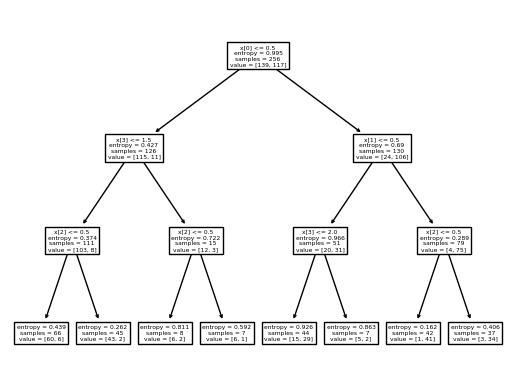

In [153]:
tree.plot_tree(clf_entropy)

## Set parameter use min_impurity_decrease

In [160]:
clf_min_impurity= DecisionTreeClassifier (criterion = "entropy", random_state= 100, min_impurity_decrease=0.0, min_samples_leaf=2, max_depth=2)

In [161]:
Clf_min_impurity = DecisionTreeClassifier(random_state=100,max_depth=2) #กำหนดว่าจะให้ต้นไม้โตกี่ชั้น กรณีนี้ คือ 2

In [162]:
Clf_min_impurity.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=100)

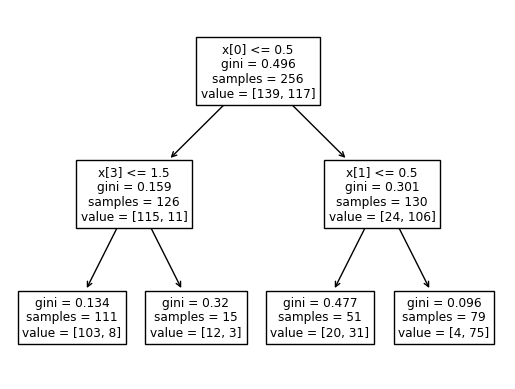

In [163]:
tree.plot_tree(Clf_min_impurity);

In [164]:
y_pred_mpd = Clf_min_impurity.predict (x_test)
print(y_pred_mpd)

[0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0]


In [165]:
#Checking Accuracy
print ("Accuracy is ", accuracy_score (y_test,y_pred_mpd)*100)

Accuracy is  89.0909090909091
